In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import glob

In [6]:
path = "../../datasets/dog"
files_move = sorted(glob.glob(path + "/clean_dog_move*.csv"))
file_info = "DogInfo.csv"

##### Carregando o dataset **DogMoveData**  limpo e converte os tipos das colunas para economizar memória

In [7]:
df_move = pd.concat((pd.read_csv(file_move) for file_move in files_move), ignore_index=True)
df_move = df_move.astype({col: 'float32' if df_move[col].dtype == 'float64' else 
                       'int32' if df_move[col].dtype == 'int64' else 
                        df_move[col].dtype for col in df_move.columns})

df_move.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556827 entries, 0 to 6556826
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   DogID     int32  
 1   ABack_x   float32
 2   ABack_y   float32
 3   ABack_z   float32
 4   ANeck_x   float32
 5   ANeck_y   float32
 6   ANeck_z   float32
 7   GBack_x   float32
 8   GBack_y   float32
 9   GBack_z   float32
 10  GNeck_x   float32
 11  GNeck_y   float32
 12  GNeck_z   float32
 13  Behavior  object 
dtypes: float32(12), int32(1), object(1)
memory usage: 375.2+ MB


##### Carregando o dataset **DogInfo** e converte os tipos das colunas para economizar memória

In [8]:
df_info = pd.read_csv(f"{path}/{file_info}")
df_info = df_info.drop(columns=['Breed', 'Age months', 'NeuteringStatus'])
df_info = df_info.astype({col: 'int32' if df_info[col].dtype == 'int64' else
                        df_info[col].dtype for col in df_info.columns})

df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DogID   45 non-null     int32
 1   Weight  45 non-null     int32
 2   Gender  45 non-null     int32
dtypes: int32(3)
memory usage: 672.0 bytes


##### Mesclando o dataset **DogInfo** com **DogMoveData**

In [9]:
df_merged = df_info.merge(df_move, on='DogID', how='inner')
df_merged.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556827 entries, 0 to 6556826
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   DogID     int32  
 1   Weight    int32  
 2   Gender    int32  
 3   ABack_x   float32
 4   ABack_y   float32
 5   ABack_z   float32
 6   ANeck_x   float32
 7   ANeck_y   float32
 8   ANeck_z   float32
 9   GBack_x   float32
 10  GBack_y   float32
 11  GBack_z   float32
 12  GNeck_x   float32
 13  GNeck_y   float32
 14  GNeck_z   float32
 15  Behavior  object 
dtypes: float32(12), int32(3), object(1)
memory usage: 425.2+ MB


##### Plotando a distribuição da ``target``

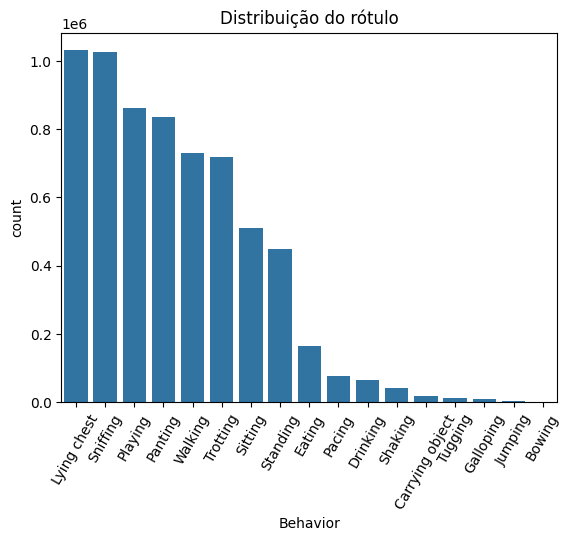

In [10]:
sns.countplot(data=df_merged, x='Behavior', order=df_merged['Behavior'].value_counts().index)
plt.title('Distribuição do rótulo')
plt.xticks(rotation=60)
plt.show()

##### Removendo classes que possuem pouca frequência

In [ ]:
counts = df_merged['Behavior'].value_counts()

frequent_behaviors = counts[counts > 40_000].index

df_filtered = df_merged[df_merged['Behavior'].isin(frequent_behaviors)].reset_index(drop=True)

df_balanced = (
    df_filtered.groupby('Behavior', group_keys=False)
    .sample(n=30_000, random_state=42, replace=False)
    .reset_index(drop=True)
)
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DogID     360000 non-null  int32  
 1   Weight    360000 non-null  int32  
 2   Gender    360000 non-null  int32  
 3   ABack_x   360000 non-null  float32
 4   ABack_y   360000 non-null  float32
 5   ABack_z   360000 non-null  float32
 6   ANeck_x   360000 non-null  float32
 7   ANeck_y   360000 non-null  float32
 8   ANeck_z   360000 non-null  float32
 9   GBack_x   360000 non-null  float32
 10  GBack_y   360000 non-null  float32
 11  GBack_z   360000 non-null  float32
 12  GNeck_x   360000 non-null  float32
 13  GNeck_y   360000 non-null  float32
 14  GNeck_z   360000 non-null  float32
 15  Behavior  360000 non-null  object 
dtypes: float32(12), int32(3), object(1)
memory usage: 23.3+ MB


##### Encoding da variável alvo

In [12]:
le = LabelEncoder()
df_filtered['Behavior'] = le.fit_transform(df_filtered['Behavior'])

##### Mapeamento dos rótulos originais de `Behavior` para seus valores codificados

In [13]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Drinking': np.int64(0),
 'Eating': np.int64(1),
 'Lying chest': np.int64(2),
 'Pacing': np.int64(3),
 'Panting': np.int64(4),
 'Playing': np.int64(5),
 'Shaking': np.int64(6),
 'Sitting': np.int64(7),
 'Sniffing': np.int64(8),
 'Standing': np.int64(9),
 'Trotting': np.int64(10),
 'Walking': np.int64(11)}

##### Separando entre ``features`` e ``target``

In [14]:
X = df_filtered.drop(columns=['DogID', 'Behavior'])
y = df_filtered['Behavior']